In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Downloads/netflix_movies (1).csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Initial data exploration
def data_summary(df):
    print("Data Summary:")
    print(df.describe())  # Summary statistics
    print("\nCorrelation Matrix:")
    print(df.corr())  # Display correlation between numeric columns

data_summary(df)

Data Summary:
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

Correlation Matrix:
              release_year
release_year           1.0


In [8]:
# Data Cleaning
# Fill missing values in 'country', 'director', and 'cast' columns for simplicity in this analysis
df['country'].fillna("Unknown", inplace=True)
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)

In [9]:
# Split 'duration' for better analysis (minutes for movies, seasons for TV shows)
df['duration_minutes'] = df['duration'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) and 'min' in x else None)
df['duration_seasons'] = df['duration'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) and 'Season' in x else None)

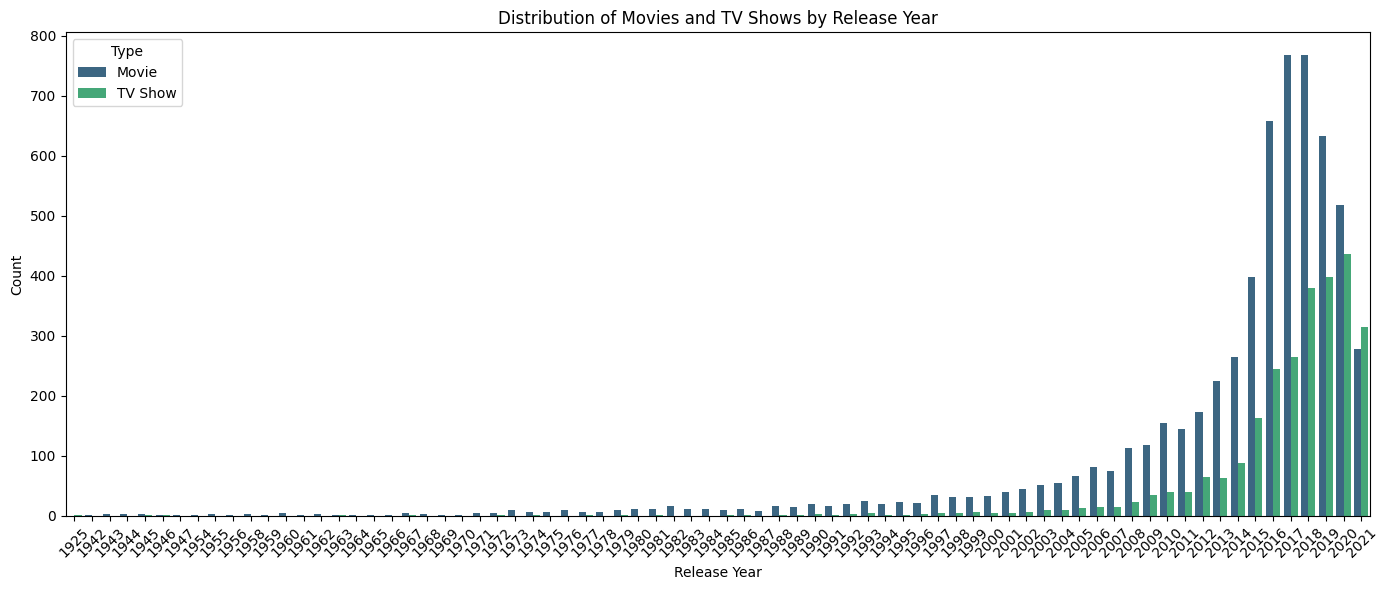

In [10]:
# Visualization 1: Bar Chart of content type distribution by release year
def plot_content_type_distribution(df):
    plt.figure(figsize=(14, 6))
    sns.countplot(data=df, x='release_year', hue='type', palette='viridis')
    plt.title('Distribution of Movies and TV Shows by Release Year')
    plt.xlabel('Release Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title="Type")
    plt.tight_layout()
    plt.show()

plot_content_type_distribution(df)

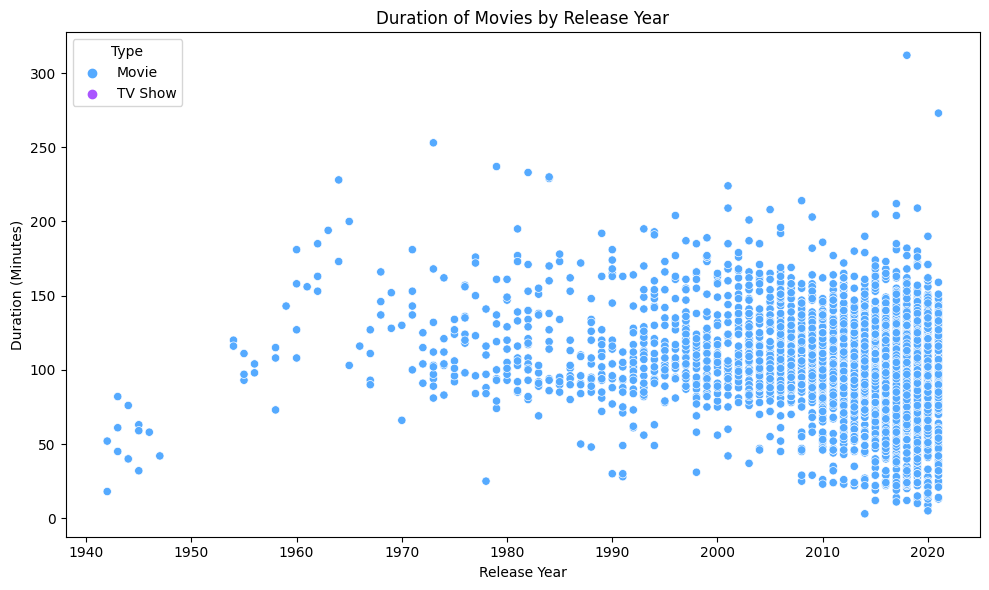

In [11]:
# Visualization 2: Scatter plot of release year vs. duration
def plot_duration_by_year(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='release_year', y='duration_minutes', hue='type', palette='cool')
    plt.title('Duration of Movies by Release Year')
    plt.xlabel('Release Year')
    plt.ylabel('Duration (Minutes)')
    plt.legend(title="Type")
    plt.tight_layout()
    plt.show()

plot_duration_by_year(df)

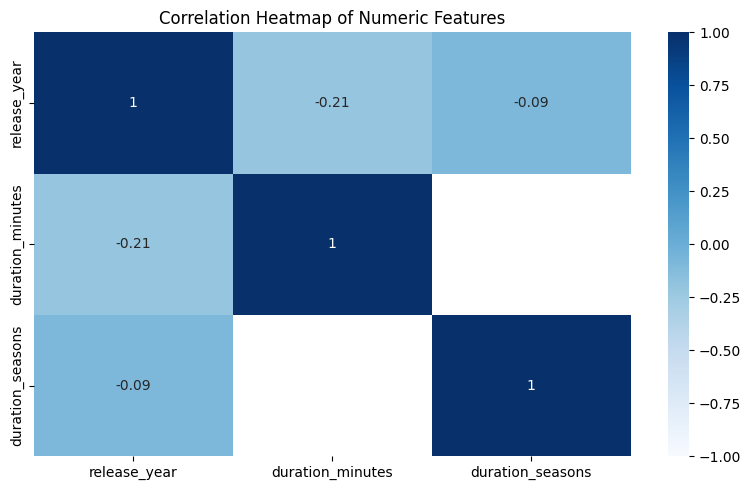

In [13]:
# Visualization 3: Heatmap of correlations between numeric features
def plot_correlation_heatmap(df):
    plt.figure(figsize=(8, 5))
    # Select numeric columns only
    numeric_df = df[['release_year', 'duration_minutes', 'duration_seasons']]
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='Blues', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap(df)